In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B66D-EEDA

 Directory of C:\Users\DELL\Documents\Pune @ Exelr\Clustering

17-08-2021  11:26    <DIR>          .
17-08-2021  11:26    <DIR>          ..
16-08-2021  12:01    <DIR>          .ipynb_checkpoints
16-08-2021  12:05            30,130 hclustnew.ipynb
16-08-2021  11:50             2,485 Hierarchical Clustering.ipynb
17-08-2021  11:26           165,305 k-means.ipynb
16-08-2021  11:49               827 Universities.csv
16-08-2021  11:50               853 University Data Hierarchical clustering.R
               5 File(s)        199,600 bytes
               3 Dir(s)  206,674,812,928 bytes free


<AxesSubplot:xlabel='X', ylabel='Y'>

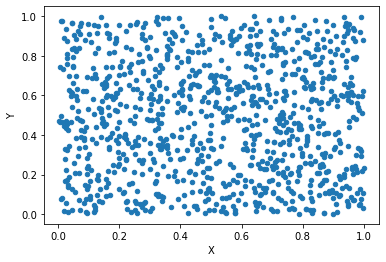

In [3]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [4]:

X = np.random.uniform(0,1,1000)
X

array([3.61601089e-01, 1.80754246e-01, 6.85055834e-01, 5.78837551e-01,
       3.72555369e-01, 3.50577607e-01, 4.36950102e-01, 3.55963550e-02,
       7.46773809e-01, 4.78941055e-01, 7.33302299e-01, 2.46663169e-01,
       4.79515837e-01, 4.24119986e-01, 1.03467178e-01, 2.30428272e-01,
       2.22658660e-01, 8.14613731e-01, 6.28597274e-01, 6.98634407e-01,
       1.39496668e-01, 1.29014356e-02, 7.18540144e-01, 2.66413642e-01,
       3.67426475e-01, 5.80663032e-01, 4.44553774e-01, 5.55879820e-01,
       7.22513650e-01, 7.65046807e-01, 5.28165634e-01, 5.14808570e-02,
       5.29126439e-01, 4.16225127e-03, 2.05403100e-01, 2.91175033e-01,
       3.04696385e-01, 1.09377097e-01, 5.20338430e-01, 5.42969163e-01,
       3.82103545e-01, 8.55320531e-01, 6.66181660e-01, 8.13645674e-01,
       9.38719612e-02, 1.14912145e-02, 7.55944579e-01, 7.86113157e-01,
       3.26217882e-01, 4.45616379e-01, 4.66956591e-01, 9.41669160e-01,
       8.42463928e-01, 7.57300815e-01, 7.68958760e-01, 1.63929622e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

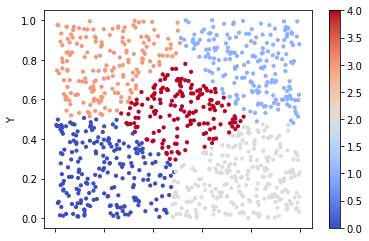

In [5]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [6]:
Univ = pd.read_csv("Universities.csv")

In [7]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [9]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([4, 2, 0, 4, 4, 3, 3, 4, 3, 2, 3, 4, 4, 1, 3, 1, 3, 1, 0, 4, 0, 4,
       4, 1, 3])

In [10]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [11]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
4,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667


In [12]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
